In [277]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Preprocessing

In [278]:
df_2019_m = pd.read_csv('run_ww_2019_m.csv')
df_2019_m.shape

(436944, 9)

In [279]:
df_2020_m = pd.read_csv('run_ww_2020_m.csv')
df_2020_m.head()

,Unnamed: 0,datetime,athlete,distance,duration,gender,age_group,country,major
0,0,2020-01-31,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019
1,1,2020-01-31,1,237.900000,1398.677419,M,35 - 54,Germany,BERLIN 2016
2,2,2020-01-31,2,106.267742,739.354839,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019"
3,3,2020-01-31,3,203.758065,935.532258,M,18 - 34,United Kingdom,LONDON 2017
4,4,2020-01-31,4,94.558065,500.838710,M,35 - 54,United States,BOSTON 2017


In [280]:
df_2019_m.isnull().sum()
df_2020_m.isnull().sum()

Unnamed: 0       0
datetime         0
athlete          0
distance         0
duration         0
gender           0
age_group        0
country       3948
major            0
dtype: int64

In [281]:
# Drop rows where country is null
df_2019_m.dropna(inplace=True)
df_2020_m.dropna(inplace=True)

In [282]:
# Convert km to miles
def convert_km_to_miles(val):
    return val * 0.621371

In [283]:
df_2019_m['distance'] = df_2019_m['distance'].apply(convert_km_to_miles)
df_2020_m['distance'] = df_2020_m['distance'].apply(convert_km_to_miles)

In [284]:
# Convert datetime to month
import calendar
def datetime_to_month(date):
    month_num = int(date[5:7])
    month_name = calendar.month_abbr[month_num]
    return month_name

In [285]:
df_2019_m['datetime'] = df_2019_m['datetime'].apply(datetime_to_month)
df_2020_m['datetime'] = df_2020_m['datetime'].apply(datetime_to_month)

In [286]:
# Get the most recent major marathon
def most_recent_major(marathon):
    if ',' in marathon:
        parts = marathon.split(',')
        marathon = parts[-1]
    return marathon

In [287]:
df_2019_m['most_recent_major'] = df_2019_m['major'].apply(most_recent_major)
df_2020_m['most_recent_major'] = df_2020_m['major'].apply(most_recent_major)

In [288]:
df_2019_m.head()

,Unnamed: 0,datetime,athlete,distance,duration,gender,age_group,country,major,most_recent_major
0,0,Jan,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019,CHICAGO 2019
1,1,Jan,1,121.161332,1132.951613,M,35 - 54,Germany,BERLIN 2016,BERLIN 2016
2,2,Jan,2,79.320413,833.290323,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019",LONDON 2019
3,3,Jan,3,242.466982,1772.225806,M,18 - 34,United Kingdom,LONDON 2017,LONDON 2017
4,4,Jan,4,62.453799,543.467742,M,35 - 54,United States,BOSTON 2017,BOSTON 2017


In [289]:
df_2020_m.head()

,Unnamed: 0,datetime,athlete,distance,duration,gender,age_group,country,major,most_recent_major
0,0,Jan,0,0.000000,0.000000,F,18 - 34,United States,CHICAGO 2019,CHICAGO 2019
1,1,Jan,1,147.824161,1398.677419,M,35 - 54,Germany,BERLIN 2016,BERLIN 2016
2,2,Jan,2,66.031693,739.354839,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019",LONDON 2019
3,3,Jan,3,126.609352,935.532258,M,18 - 34,United Kingdom,LONDON 2017,LONDON 2017
4,4,Jan,4,58.755639,500.838710,M,35 - 54,United States,BOSTON 2017,BOSTON 2017


## Visualization

### Distribution of Gender

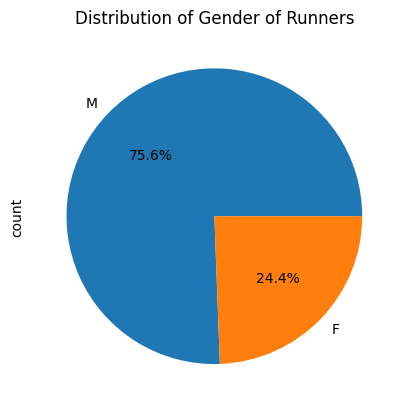

In [290]:
counts = df_2020_m['gender'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Gender of Runners')
plt.show()

### Distribution of Age Group

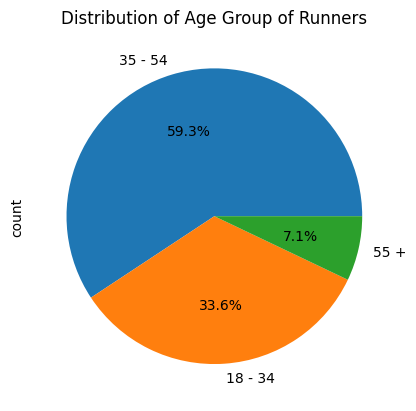

In [291]:
counts = df_2020_m['age_group'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Age Group of Runners')
plt.show()

### Top 10 Countries for Runners

Text(0.5, 1.0, 'Top 10 Countries of Runners')

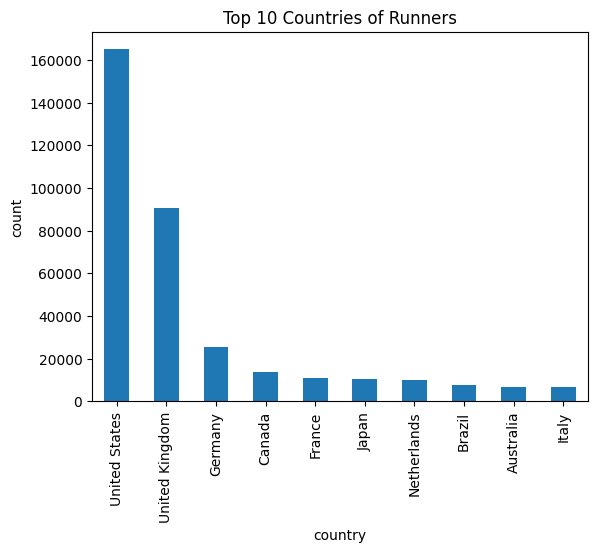

In [292]:
top_10_counts = df_2020_m['country'].value_counts().head(10)
top_10_counts.plot(kind='bar')
plt.ylabel('count')
plt.title('Top 10 Countries of Runners')

### Top 10 Most Popular Recent World Marathons

Text(0.5, 1.0, 'Top 10 Most Popular Recent World Marathons')

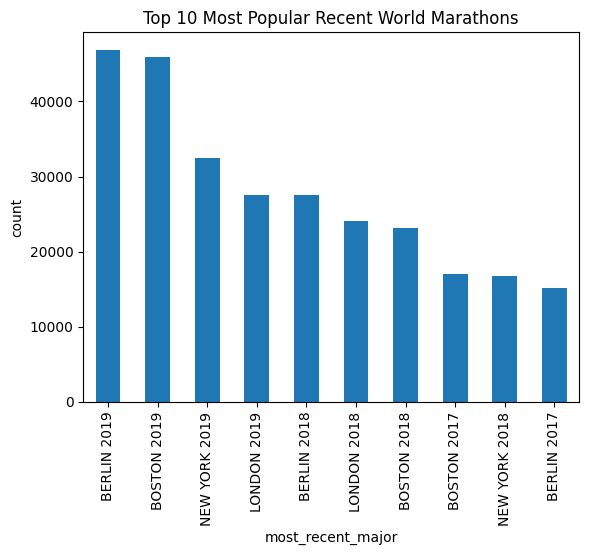

In [293]:
top_10_counts = df_2020_m['most_recent_major'].value_counts().head(10)
top_10_counts.plot(kind='bar')
plt.ylabel('count')
plt.title('Top 10 Most Popular Recent World Marathons')

### Total Hours Ran in 2019 vs 2020

Text(0.5, 0, 'Years')

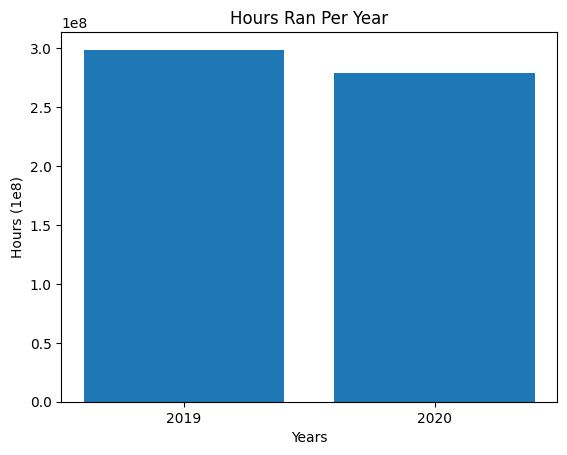

In [294]:
sum_mins_2019 = df_2019_m['duration'].sum()
sum_hrs_2019 = sum_mins_2019 / 60
sum_mins_2020 = df_2020_m['duration'].sum()
sum_hrs_2020 = sum_mins_2020 / 60
years = ['2019', '2020']
hrs_ran = [sum_mins_2019, sum_mins_2020]

plt.bar(years, hrs_ran)
plt.title('Hours Ran Per Year')
plt.ylabel('Hours (1e8)')
plt.xlabel('Years')

### Total Distance Ran in 2019 vs 2020

Text(0.5, 0, 'Years')

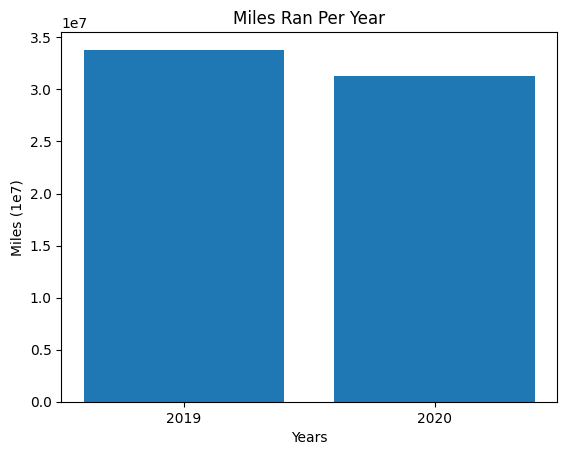

In [295]:
sum_mins_2019 = df_2019_m['distance'].sum()
sum_hrs_2019 = sum_mins_2019
sum_mins_2020 = df_2020_m['distance'].sum()
sum_hrs_2020 = sum_mins_2020
years = ['2019', '2020']
hrs_ran = [sum_mins_2019, sum_mins_2020]

plt.bar(years, hrs_ran)
plt.title('Miles Ran Per Year')
plt.ylabel('Miles (1e7)')
plt.xlabel('Years')

### Miles Run in 2020 based on Age Group

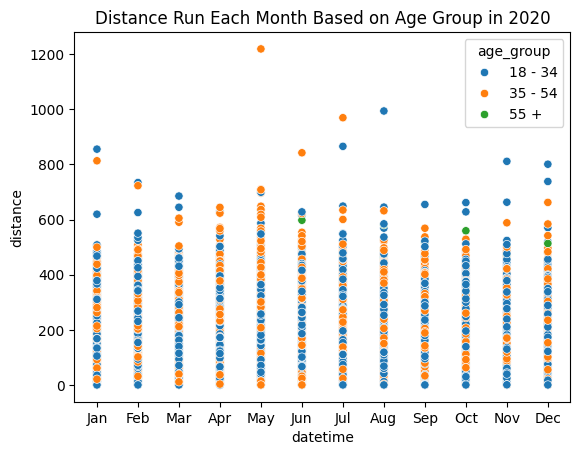

In [296]:
sns.scatterplot(data=df_2020_m, x='datetime', y='distance', hue='age_group')
plt.title('Distance Run Each Month Based on Age Group in 2020')
plt.show()



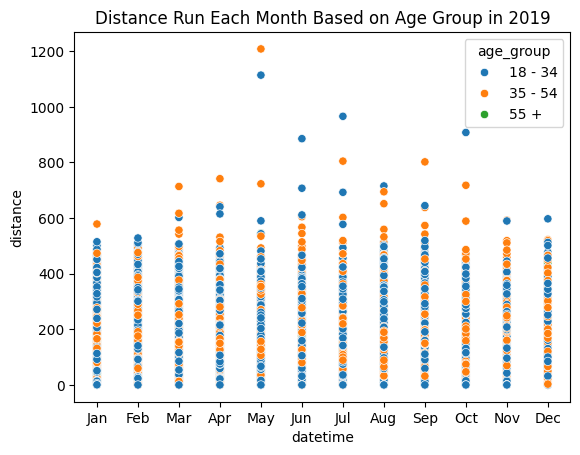

In [297]:
sns.scatterplot(data=df_2019_m, x='datetime', y='distance', hue='age_group')
plt.title('Distance Run Each Month Based on Age Group in 2019')
plt.show()

## Linear Regression Models

### Gender versus mileage in 2020

In [298]:
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind, chisquare, normaltest
import statsmodels as sm
from sklearn.preprocessing import OneHotEncoder

In [299]:
df_2020_m = pd.get_dummies(df_2020_m, columns = ['gender'], drop_first=False)

In [300]:
df_2020_m.head()

,Unnamed: 0,datetime,athlete,distance,duration,age_group,country,major,most_recent_major,gender_F,gender_M
0,0,Jan,0,0.000000,0.000000,18 - 34,United States,CHICAGO 2019,CHICAGO 2019,True,False
1,1,Jan,1,147.824161,1398.677419,35 - 54,Germany,BERLIN 2016,BERLIN 2016,False,True
2,2,Jan,2,66.031693,739.354839,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019",LONDON 2019,False,True
3,3,Jan,3,126.609352,935.532258,18 - 34,United Kingdom,LONDON 2017,LONDON 2017,False,True
4,4,Jan,4,58.755639,500.838710,35 - 54,United States,BOSTON 2017,BOSTON 2017,False,True


In [301]:
model_gender = smf.ols(formula='distance ~ gender_F + gender_M + 1', data=df_2020_m)
results_gender = model_gender.fit()
print(results_gender.summary())

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     556.8
Date:                Sat, 14 Dec 2024   Prob (F-statistic):          3.15e-242
Time:                        22:58:57   Log-Likelihood:            -2.4852e+06
No. Observations:              432996   AIC:                         4.970e+06
Df Residuals:                  432993   BIC:                         4.971e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8.084e+10   9.56e+10  

In [302]:
results_gender.pvalues[1]
results_gender.pvalues[2]

0.39762584534371925

### Age Group vs Mileage in 2020

In [303]:
df_2020_m = pd.get_dummies(df_2020_m, columns = ['age_group'], drop_first=False)

In [304]:
df_2020_m.columns

Index(['Unnamed: 0', 'datetime', 'athlete', 'distance', 'duration', 'country',
       'major', 'most_recent_major', 'gender_F', 'gender_M',
       'age_group_18 - 34', 'age_group_35 - 54', 'age_group_55 +'],
      dtype='object')

In [305]:
df_2020_m.rename(columns={'age_group_18 - 34': 'age_group_18to34', 'age_group_35 - 54': 'age_group_35to54', 'age_group_55 +': 'age_group_55plus'}, inplace=True)

In [306]:
df_2020_m.head()

,Unnamed: 0,datetime,athlete,distance,duration,country,major,most_recent_major,gender_F,gender_M,age_group_18to34,age_group_35to54,age_group_55plus
0,0,Jan,0,0.000000,0.000000,United States,CHICAGO 2019,CHICAGO 2019,True,False,True,False,False
1,1,Jan,1,147.824161,1398.677419,Germany,BERLIN 2016,BERLIN 2016,False,True,False,True,False
2,2,Jan,2,66.031693,739.354839,United Kingdom,"LONDON 2018,LONDON 2019",LONDON 2019,False,True,False,True,False
3,3,Jan,3,126.609352,935.532258,United Kingdom,LONDON 2017,LONDON 2017,False,True,True,False,False
4,4,Jan,4,58.755639,500.838710,United States,BOSTON 2017,BOSTON 2017,False,True,False,True,False


In [307]:
model_age = smf.ols(formula='distance ~ age_group_18to34 + age_group_35to54 + age_group_55plus + 1', data=df_2020_m)
results_age = model_age.fit()
print(results_age.summary())

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sat, 14 Dec 2024   Prob (F-statistic):          5.25e-114
Time:                        22:58:58   Log-Likelihood:            -2.4855e+06
No. Observations:              432996   AIC:                         4.971e+06
Df Residuals:                  432992   BIC:                         4.971e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Predicting Duration of Run based on Distance

In [310]:
model_duration = smf.ols(formula='duration ~ distance + 1', data=df_2019_m)
results_pace = model_duration.fit()
print(results_pace.summary())

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 5.516e+06
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:59:29   Log-Likelihood:            -2.8334e+06
No. Observations:              432996   AIC:                         5.667e+06
Df Residuals:                  432994   BIC:                         5.667e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.9201      0.375    119.741      0.0

In [312]:
y_pred = results_pace.predict(df_2020_m['distance'])

## Comparing Predicted vs Actual

In [327]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_true = df_2020_m['duration']

mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)
r2 = r2_score(y_true, y_pred)
print("R² Score:", r2)

Mean Squared Error (MSE): 27967.88842398535
Mean Absolute Error (MAE): 91.42388331680996
R² Score: 0.9349672301099388


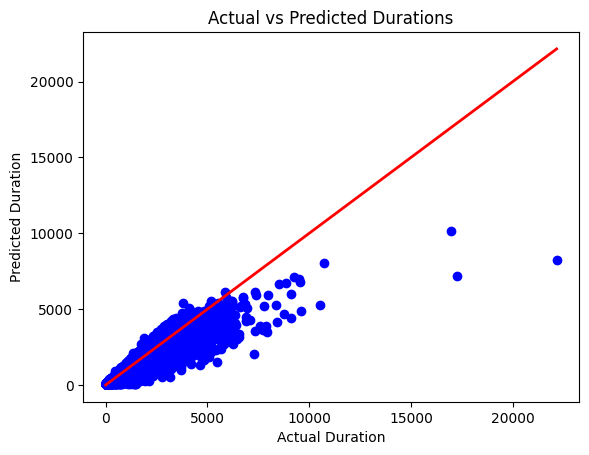

In [328]:
plt.scatter(y_true, y_pred, color='blue')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linewidth=2)  # Identity line
plt.xlabel("Actual Duration")
plt.ylabel("Predicted Duration")
plt.title("Actual vs Predicted Durations")
plt.show()

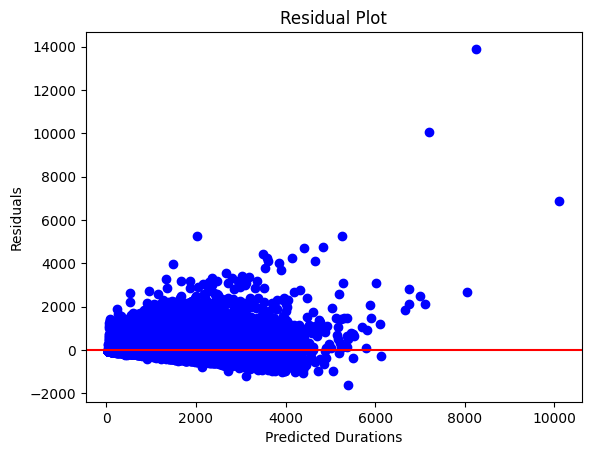

In [324]:
residuals = y_true - y_pred

plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel("Predicted Durations")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()